# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from math import sqrt
from scipy.stats import norm
from scipy.stats import ttest_ind
from numpy.random import seed
file_location ='C:/Users/Greki/Frequentist_Inference/data/raw'
medical = pd.read_csv(file_location+'/insurance2.csv').sort_values(by='charges', ascending=True)

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
940,18,1,23.21,0,0,2,1121.8739,0
808,18,1,30.14,0,0,2,1131.5066,1
1244,18,1,33.33,0,0,2,1135.9407,1
663,18,1,33.66,0,0,2,1136.3994,1
22,18,1,34.10,0,0,2,1137.0110,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

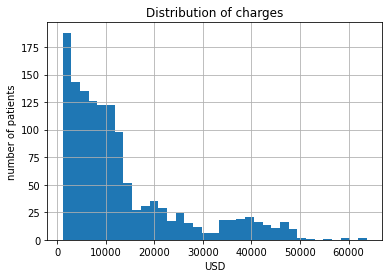

In [6]:
_=medical.hist('charges', bins=35)
_ = plt.xlabel('USD')
_ = plt.ylabel('number of patients')
_ = plt.title('Distribution of charges')

In [7]:
mean= round(np.mean(medical.charges),2)
print("Mean: $" + str(mean))

std_dev =  round(np.std(medical.charges),2)
print("Standard Deviation: $" + str(std_dev))

min =  round(np.min(medical.charges),2)
print("Minimum: $" + str(min))

median =  round(np.median(medical.charges),2)
print("Median: $" + str(median))

max =  round(np.max(medical.charges),2)
print("Maximum: $" + str(max))

p25, p75 = np.percentile(medical.charges, [25, 75])
percen = np.percentile(medical.charges, [69])
print(percen)
print("25th Percentile: $"+str(round(p25,2)) + ", 75th Percentile: $"+str(round(p75,2)))

Mean: $13270.42
Standard Deviation: $12105.48
Minimum: $1121.87
Median: $9382.03
Maximum: $63770.43
[13422.456669]
25th Percentile: $4740.29, 75th Percentile: $16639.91


Medical charges distribution is skewed heavily to the left side of the mean ($13270.42) with the median at $9382.03.  There is a long tail that tappers to the right.  The distribution is not remotely normal.  

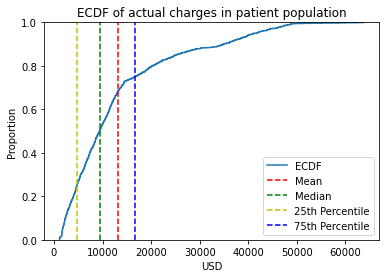

In [8]:
#grapgh ecdf and mean, median,25th and 75th percentile to show if data is normal or not

_=sns.ecdfplot(data=medical.charges, label='ECDF' )
_=plt.axvline(mean, color='r', linestyle='--', label='Mean')
_=plt.axvline(median, color='g', linestyle='--', label='Median')
_=plt.axvline(p25, color='y', linestyle='--', label='25th Percentile')
_=plt.axvline(p75, color='b', linestyle='--', label='75th Percentile')
_=plt.title('ECDF of actual charges in patient population')
_= plt.xlabel('USD')
_=plt.legend()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Although the mean exceedes 12,000 the sckewed nature of this distribution is a cause for concern. with a median of approx 9,000 (50th percentile) and the mean is 13,270 ( approx 69th percentile).  This means that the remaining 30 percent of the medical  have to be at a very high value to offset the values that are to the left of the mean. 

In [9]:
medical_charges=np.array(medical['charges'])

In [10]:
def medrec_sampler(n):
    return np.random.choice(medical_charges, n)

In [11]:
seed(47)
super_samples = [np.mean(medrec_sampler(50)) for i in range(300)]
medrec_super_samples= np.sort(super_samples)
mean_of_means= np.mean(medrec_super_samples)
STD= np.std(medrec_super_samples,ddof=1)
H_12000= norm.cdf(12000,mean_of_means,STD)
mean_x_max = norm.cdf(mean_of_means,mean_of_means,STD)
h_mean=norm.cdf(mean_of_means,mean_of_means,STD)
min_mean= np.min(medrec_super_samples)
max_mean=np.max(medrec_super_samples)

In [12]:
print(min_mean)
print(max_mean)
print(mean_of_means)
print(STD)

9036.8968028
19267.910133799996
13315.186266487599
1662.349076113126


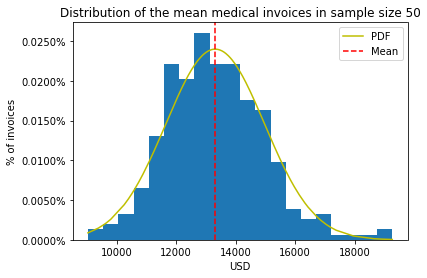

In [13]:
_= plt.hist(medrec_super_samples, bins= 20, density = True )
_=dist = norm.pdf(medrec_super_samples, mean_of_means, STD)
_= plt.plot(medrec_super_samples,dist, color='y', label ='PDF')
_=plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
_ = plt.xlabel('USD')
_ = plt.ylabel('% of invoices')
#_= plt.yaxis.set_major_formatter(mtick.PercentFormatter())
_ = plt.title('Distribution of the mean medical invoices in sample size 50')
_=plt.axvline(mean_of_means, color='r', linestyle='--', label='Mean')
_=plt.legend()

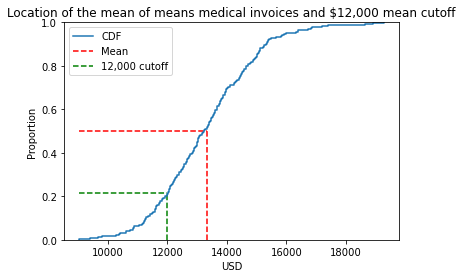

In [14]:
#grapgh cdf and mean, median, and 12,000 cutoff

_=sns.ecdfplot(data=medrec_super_samples, label='CDF' )
_=plt.vlines(x=mean_of_means,ymin=0, ymax= mean_x_max,color='r', linestyle='--', label='Mean')
_=plt.hlines(y=h_mean,xmin=min_mean,xmax=mean_of_means, color='r', linestyle='--')
_=plt.vlines(x=12000,ymin=0, ymax= H_12000,color='g', linestyle='--', label='12,000 cutoff')
_=plt.hlines(y=H_12000,xmin=min_mean,xmax=12000, color='g', linestyle='--')
_= plt.xlabel('USD')
_=plt.legend()
_ = plt.title('Location of the mean of means medical invoices and $12,000 mean cutoff')

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

 __A:__  Given that the administrator is concerned with the mean being below $12,000, the answer would be to utilize a one-sided interval utilizing a Z score due to sample size of 200. critical value = 1 -0.95 = 0.05. Z Score = -1.65   lower confidence interval is calculated as ( Mean - Zscore(standard deviation/ sqrt of sample size)) = 13315 -1.65(1662/(300 ^ 1/2)) = 13315-158.33= 13156.67.  

Given that the lower confidence interval is 13,156.67, then the Administrator should have 95% confidence that the mean will be greater 13,156.67 and $12,000 or less would be an exception.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

## Hypothesis

H0 = mean0 = mean1 = insured and uninsured are charged the same

Ha = mean0 ≠ mean1 = insured and uninsured are charged differently

## Insured Population

In [15]:
def insur_sampler(data,n):
    return np.random.choice(data, n)

Mean: $16423.93
Standard Deviation: $14036.96
Minimum: $1131.51
Median: $11538.42
Maximum: $63770.43
Size: 783


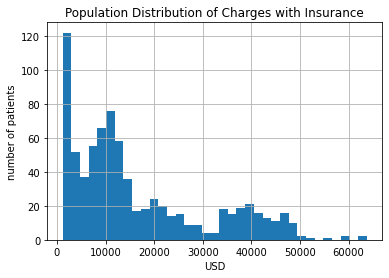

In [16]:
#Calc for insured population
W_insur=(medical.query('insuranceclaim==1').charges)

#Histogram for insured population
_=W_insur.hist( bins=35)
_ = plt.xlabel('USD')
_ = plt.ylabel('number of patients')
_ = plt.title('Population Distribution of Charges with Insurance')

# Descriptive statistics for insured population
mean_W_insur= round(np.mean(W_insur),2)
print("Mean: $" + str(mean_W_insur))

std_dev_insur =  round(np.std(W_insur),2)
print("Standard Deviation: $" + str(std_dev_insur))

min =  round(np.min(W_insur),2)
print("Minimum: $" + str(min))

median =  round(np.median(W_insur),2)
print("Median: $" + str(median))

max =  round(np.max(W_insur),2)
print("Maximum: $" + str(max))

W_Insur_size = W_insur.size

print("Size: "+ str(W_Insur_size))

## Insured Sample

In [17]:
#Statistics for insured sample
seed(47)
w_insur_samples = [insur_sampler(W_insur,1) for i in range(7)]

w_insur_sorted_samples= np.sort(np.array(w_insur_samples),axis=0)

mean_w_insur_samples= np.mean(w_insur_sorted_samples)
STD_w_insur_samples= np.std(w_insur_sorted_samples,ddof=1)
Var_w_insur_samples= STD_w_insur_samples**2
w_insur_count= (w_insur_sorted_samples.size)
print("Mean samples from with insurance: "+ str(mean_w_insur_samples))
print("STD samples from with insurance: "+ str(STD_w_insur_samples))
print("Variance samples from with insurance: "+ str(Var_w_insur_samples))
print("number of samples from with insurance: "+ str(w_insur_count))

Mean samples from with insurance: 12479.178692857144
STD samples from with insurance: 13895.209332881295
Variance samples from with insurance: 193076842.40459144
number of samples from with insurance: 7


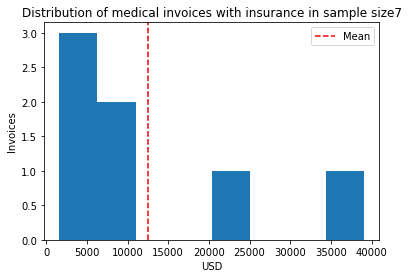

In [18]:
#histogram for insured sample
_= plt.hist(w_insur_sorted_samples, bins= 8, density = False )
_=dist_w_insur = norm.pdf(w_insur_sorted_samples, mean_w_insur_samples, STD_w_insur_samples)
#_= plt.plot(w_insur_sorted_samples,dist_w_insur, color='y', label ='PDF')
#_=plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
_ = plt.xlabel('USD')
_ = plt.ylabel('Invoices')
_ = plt.title('Distribution of medical invoices with insurance in sample size' + str(w_insur_count) )
_=plt.axvline(mean_w_insur_samples, color='r', linestyle='--', label='Mean')
_=plt.legend()

## Uninsured Population

Mean: $8821.42
Standard Deviation: $6440.7
Minimum: $1121.87
Median: $6933.24
Maximum: $36910.61
Size: 555


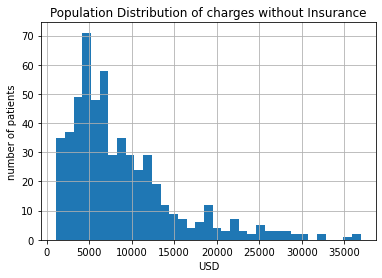

In [19]:
#Calc for uninsured population
WO_insur=(medical.query('insuranceclaim==0').charges)

#Historam for uninsured population
_=WO_insur.hist( bins=35)
_ = plt.xlabel('USD')
_ = plt.ylabel('number of patients')
_ = plt.title('Population Distribution of charges without Insurance')

mean_WO_insur= round(np.mean(WO_insur),2)
print("Mean: $" + str(mean_WO_insur))

std_dev_WO_insur =  round(np.std(WO_insur),2)
print("Standard Deviation: $" + str(std_dev_WO_insur))

min =  round(np.min(WO_insur),2)
print("Minimum: $" + str(min))

median =  round(np.median(WO_insur),2)
print("Median: $" + str(median))

max =  round(np.max(WO_insur),2)
print("Maximum: $" + str(max))

WO_Insur_size = WO_insur.size

print("Size: "+ str(WO_Insur_size))

## Uninsured Sample

In [20]:
#Statistics for uninsured sample
seed(47)
wo_insur_samples = [insur_sampler(WO_insur,1) for i in range(7)]

wo_insur_sorted_samples= np.sort(np.array(wo_insur_samples),axis=0)

mean_wo_insur_samples= np.mean(wo_insur_sorted_samples)
STD_wo_insur_samples= np.std(wo_insur_sorted_samples,ddof=1)
Var_wo_insur_samples= STD_wo_insur_samples**2
wo_insur_count= (wo_insur_sorted_samples.size)
print("Mean samples from without insurance: "+ str(mean_wo_insur_samples))
print("STD samples from without insurance: "+ str(STD_wo_insur_samples))
print("Var samples from without insurance: "+ str(Var_wo_insur_samples))
print("number of samples from without insurance: "+ str(wo_insur_count))

Mean samples from without insurance: 4437.362942857143
STD samples from without insurance: 2303.4757778349863
Var samples from without insurance: 5306000.659072495
number of samples from without insurance: 7


__A:__

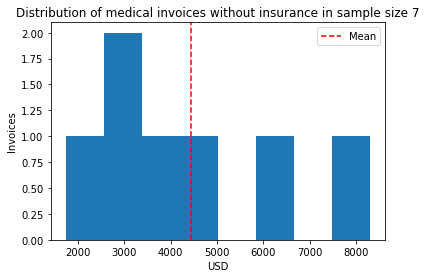

In [21]:
#Historam for uninsured sample
_= plt.hist(wo_insur_sorted_samples, bins= 8, density = False )
_=dist_wo_insur = norm.pdf(wo_insur_sorted_samples, mean_wo_insur_samples, STD_wo_insur_samples)
#_= plt.plot(wo_insur_sorted_samples,dist_wo_insur, color='y', label ='PDF')
#_=plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
_ = plt.xlabel('USD')
_ = plt.ylabel('Invoices')
_ = plt.title('Distribution of medical invoices without insurance in sample size ' + str(wo_insur_count))
_=plt.axvline(mean_wo_insur_samples, color='r', linestyle='--', label='Mean')
_=plt.legend()

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [22]:
# manual calc for ttest

sp=(((w_insur_count -1)*Var_w_insur_samples)+((wo_insur_count -1)*Var_wo_insur_samples))/(w_insur_count+wo_insur_count-2)



t_stat_manual=(mean_w_insur_samples - mean_wo_insur_samples)/sqrt(((sp/w_insur_count)+(sp/wo_insur_count)))

print("Manual T-Test statistic calculation: " + str(t_stat_manual))

print("Could not calculate statistic manually without t table that did not have a value for t 0f 1.51. Assumed df for t table should be derived from smaller n value.  both are 7 chose df of 6. value from table for two sided ttest is 0.184")

Manual T-Test statistic calculation: 1.5106055764909945
Could not calculate statistic manually without t table that did not have a value for t 0f 1.51. Assumed df for t table should be derived from smaller n value.  both are 7 chose df of 6. value from table for two sided ttest is 0.184


In [23]:
ttest=ttest_ind(w_insur_sorted_samples, wo_insur_sorted_samples, axis=None, equal_var=False)
print(ttest)

Ttest_indResult(statistic=1.5106055764909945, pvalue=0.17909593083942885)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Ztest are used when population parameters are known.  T-test when population parameters are unknown

## Learning outcomes

##### Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test